<a href="https://colab.research.google.com/github/CameronChadwick/data_analysis/blob/main/panda_weather_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount the drive

The path to drive is '/content/drive'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Display the contents of the folder where the data exists

Use `!ls` followed by the path to the folder containg the data file.  Be sure to escape `\` any special characters, like spaces, that might be part of a folder name. The path to the folder begins with the path used above and ends with `/*.txt`. This will display all (`*`) files, with extension `.txt` that are in the location provided by the path.

ex: `!ls content/drive/My\ Drive/ColabNBs/*.txt`

Notice the escaped space between "My" and "Drive".  Also when doing this the path is NOT in quotes, the language here is not Python but Command Line and as such does not require the path to be a string.

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/*.txt

'/content/drive/My Drive/Colab Notebooks/PortlandWeather2013b.txt'


# Create a convert_temp function

The temperatures, in the data, are in degrees Celsius and mulitplied by 10 so there are no decimals in the data.  Create a function to convert a given temp to a temp in degrees Fahrenheit, rounded to one decimal place.



In [ ]:
def temp_convert(temp):
  convert_decimal = int(temp)/10
  convert_temp = round(1.8 * convert_decimal + 32, 1)
  return convert_temp


# Read the data from the file

Create the path (should be the one use above, with the specific file that you will read from).

Use this path to read the dat from the file.  Decide how you will do this and what format would you like the data returned as.

Spend some time looking at the data and deciding how you will "clean" the data.  

1.   Which columns of data are of interest and wich will be ignored
2.   What are the data types currently and what do you want them to be
3.   What data do you want and how will you store the data you choose
4.   How will you convert the data that needs changing
5.   Is there any missing or unusual data? How will you handle this?
6.   Other?

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/PortlandWeather2013b.txt'

with open(path) as f:
  data_list = f.readlines()[2:]

# Create a Python dictionary with the weather data

Copy/Paste your code from the previous NB

In [ ]:
dates = []
min = []
max = []


for line in data_list:
    # print(line.split())
    date = (line.split()[1])
    max_temp = int(line.split()[5])
    min_temp = int(line.split()[6])
    
    con_max = temp_convert(max_temp)
    con_min = temp_convert(min_temp)


    dates.append(date)
    min.append(con_min)
    max.append(con_max)

weather = {'dates':dates, 'tmin':min, 'tmax':max}

# Pandas

## Create a Dataframe using the weather dictionary

In [ ]:
# create a pandas df
import pandas as pd
import numpy as np

df = pd.DataFrame(weather)
df



,dates,tmin,tmax
0,20130101,10.9,32.0
1,20130102,3.0,24.1
2,20130103,-0.0,23.0
3,20130104,9.0,34.0
4,20130105,16.0,36.0
...,...,...,...
360,20131227,7.2,32.0
361,20131228,18.1,37.0
362,20131229,20.1,35.1
363,20131230,8.2,35.1


## Display the first 5 and last 5 rows

In [ ]:
print(df.head())
print()
print(df.tail(10))
print()
print(df[6: 21])

      dates  tmin  tmax
0  20130101  10.9  32.0
1  20130102   3.0  24.1
2  20130103  -0.0  23.0
3  20130104   9.0  34.0
4  20130105  16.0  36.0

        dates  tmin  tmax
355  20131222  27.1  35.1
356  20131223  27.1  33.1
357  20131224  16.2  33.1
358  20131225   5.2  20.1
359  20131226  12.2  25.2
360  20131227   7.2  32.0
361  20131228  18.1  37.0
362  20131229  20.1  35.1
363  20131230   8.2  35.1
364  20131231   1.2  13.1

       dates  tmin  tmax
6   20130107  15.1  30.9
7   20130108  12.9  43.0
8   20130109  16.0  39.9
9   20130110  27.0  44.1
10  20130111  19.0  36.0
11  20130112  33.1  42.1
12  20130113  36.0  45.0
13  20130114  35.1  59.0
14  20130115  28.9  37.9
15  20130116  28.9  33.1
16  20130117  18.0  39.9
17  20130118   9.0  19.9
18  20130119  16.0  42.1
19  20130120  26.1  48.9
20  20130121  17.1  27.0


## Display a summary of basic information about your df, in two ways

In [ ]:
# df.info() and df.describe()
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dates   365 non-null    object 
 1   tmin    365 non-null    float64
 2   tmax    365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB
None

             tmin        tmax
count  365.000000  365.000000
mean    38.138904   55.941644
std     17.374042   18.882167
min     -5.800000    8.100000
25%     26.200000   39.900000
50%     37.000000   57.000000
75%     52.000000   71.100000
max     73.000000   95.000000


## Display the first 3 rows of the max temps columns using 2 different methods. Assign each to a different variable and use print( ) to display.

In [ ]:
# df.iloc[[rowstart:rowstop], [col1]] for integer selection; 
# stop is exclusive due to zero indexing
# df.loc[[rowstart:rowstop], [col1]] for label selection; 
# stop is inclusive

ex1 = df.loc[:3, ['dates', 'tmax', 'tmin']]

ex2 = df.iloc[:4, [0, 1, 2]]

print(ex1)
print()
print(ex2)

      dates  tmax  tmin
0  20130101  32.0  10.9
1  20130102  24.1   3.0
2  20130103  23.0  -0.0
3  20130104  34.0   9.0

      dates  tmin  tmax
0  20130101  10.9  32.0
1  20130102   3.0  24.1
2  20130103  -0.0  23.0
3  20130104   9.0  34.0


## ## Display the rows 10, 100, 200, and 365 of the date and min temps columns using 2 different methods. Assign each to a different variable and use print( ) to display.

In [ ]:
# df.iloc[[row1, row2, ...], [col1, col2, ...]] for integer selection; 
# stop is exclusive due to zero indexing
# df.loc[[row1, row2, ...], [col1, col2, ...]] for label selection; 
# stop is inclusive

ex3 = df.iloc[[9, 99, 199, 364], [0, 1]]

ex4 = df.loc[[9, 99, 199, 364], ['dates', 'tmin']]

print(ex3)
print()
print(ex4)

        dates  tmin
9    20130110  27.0
99   20130410  42.1
199  20130719  69.1
364  20131231   1.2

        dates  tmin
9    20130110  27.0
99   20130410  42.1
199  20130719  69.1
364  20131231   1.2


## Select only the rows where the max temps are greater than 90. Assign this to a variable

In [ ]:
# df.loc[df[col] condition]

t90 = df.loc[df['tmax'] > 90]

print(t90)

        dates  tmin  tmax
150  20130531  57.9  91.9
174  20130624  66.9  91.9
175  20130625  69.1  91.0
185  20130705  73.0  93.0
195  20130715  70.0  91.0
199  20130719  69.1  95.0
200  20130720  70.0  91.0
253  20130911  61.0  93.0


## Using the dataframe (assigned to a variable) from the previous cell, get just the dates where the temperature was greater than 90.  Convert to a Python list.

In [ ]:
# df[col]
d90 = t90['dates']
print(d90)

150    20130531
174    20130624
175    20130625
185    20130705
195    20130715
199    20130719
200    20130720
253    20130911
Name: dates, dtype: object


## Convert to a Python list

In [ ]:
# df.tolist()
list90 = d90.tolist()
print(list90)

['20130531', '20130624', '20130625', '20130705', '20130715', '20130719', '20130720', '20130911']


# Plot Weather Data

Plot the days of the year where the minimum temperature greater than 40 degrees.

In [ ]:
t10 = df.loc[df['tmin'] < 10]
dates = t10.loc[:, 'dates']
temps = t10.loc[:, 'tmin']
print(dates)
print()
print(t10)

1      20130102
2      20130103
3      20130104
17     20130118
21     20130122
22     20130123
23     20130124
24     20130125
26     20130127
27     20130128
40     20130210
41     20130211
346    20131213
347    20131214
348    20131215
349    20131216
350    20131217
358    20131225
360    20131227
363    20131230
364    20131231
Name: dates, dtype: object

        dates  tmin  tmax
1    20130102   3.0  24.1
2    20130103  -0.0  23.0
3    20130104   9.0  34.0
17   20130118   9.0  19.9
21   20130122   8.1  21.9
22   20130123  -0.0   8.1
23   20130124  -4.0  18.0
24   20130125   1.0  23.0
26   20130127   9.0  28.0
27   20130128   9.0  27.0
40   20130210   9.0  37.0
41   20130211   9.0  41.0
346  20131213   6.3  26.2
347  20131214   3.2  14.2
348  20131215   6.3  21.2
349  20131216   6.3  25.2
350  20131217  -5.8  14.2
358  20131225   5.2  20.1
360  20131227   7.2  32.0
363  20131230   8.2  35.1
364  20131231   1.2  13.1


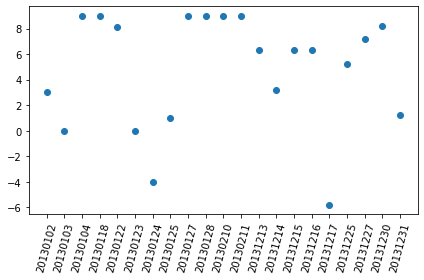

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.scatter(dates, temps)
plt.xticks(rotation = 75)

plt.tight_layout()
plt.show()